# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B/fraudTest.csv")

In [33]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [34]:
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]

In [35]:

df_select.head()

,trans_date_trans_time,category,amt,city_pop,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,333497,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0
4,2020-06-21 12:15:17,travel,3.19,1126,0


In [36]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [37]:


df_select["time_var"] = [i.hour for i in df["trans_date_trans_time"]]

<ipython-input-37-cfde9eb7f408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.hour for i in df["trans_date_trans_time"]]


In [38]:
df_select["evening"] = np.where(df_select["time_var"] > 18, 1, 0)

<ipython-input-38-fb765dbf3868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["evening"] = np.where(df_select["time_var"] > 18, 1, 0)


In [39]:
df_select["morning"] = np.where(df_select["time_var"]< 5, 1, 0)

<ipython-input-39-a906eb8cc20a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["morning"] = np.where(df_select["time_var"]< 5, 1, 0)


In [40]:
df_select["day"] = [1 if 5< i <=18 else 0 for i in df_select["time_var"] ]

<ipython-input-40-a254f476863a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["day"] = [1 if 5< i <=18 else 0 for i in df_select["time_var"] ]


In [41]:
dummies = pd.get_dummies(df_select["category"])
X = pd.concat([dummies, df_select[["amt", "city_pop", "time_var", "evening",	"morning",	"day"]]], axis = 1)
y = df_select["is_fraud"]

In [42]:
X

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var,evening,morning,day
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,12,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,12,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,12,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,12,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,12,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,43.77,519,23,1,0,0
555715,0,0,0,0,0,0,0,1,0,0,0,0,0,0,111.84,28739,23,1,0,0
555716,0,0,0,0,0,0,0,1,0,0,0,0,0,0,86.88,3684,23,1,0,0
555717,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.99,129,23,1,0,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [53]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [54]:
ros = RandomOverSampler(random_state=0)
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=0)
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [55]:
from sklearn.linear_model import LogisticRegression
clf_over = LogisticRegression()
clf_over.fit(over_X, over_y)


clf_under = LogisticRegression()
clf_under.fit(under_X, under_y)


clf_smote = LogisticRegression()
clf_smote.fit(smote_X, smote_y)


LogisticRegression()

# 4.) Test the three models

In [56]:
print("The accuracy of the model on oversample data is", clf_over.score(X_test, y_test))

The accuracy of the model on oversample data is 0.8073670193622687


In [57]:
print("The accuracy of the model on undersample data is", clf_under.score(X_test, y_test))

The accuracy of the model on undersample data is 0.8068451738285467


In [58]:
print("The accuracy of the model on SMOTE data is", clf_smote.score(X_test, y_test))

The accuracy of the model on SMOTE data is 0.8179118980781689


# 5.) Which performed best in Out of Sample metrics?

#### We can see from the results above that the Logistic regression model on SMOTE data performed best in Out of Sample metrics, which gives the highest mean accuracy of 0.8179118980781689

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [59]:
import matplotlib.pyplot as plt

In [60]:
OG_data_temp = pd.concat([X_train, y_train], axis = 1)

In [61]:
OG_data_temp

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,shopping_net,shopping_pos,travel,amt,city_pop,time_var,evening,morning,day,is_fraud
385338,0,0,0,0,0,0,0,1,0,0,...,0,0,0,166.27,107941,15,0,0,1,0
25143,1,0,0,0,0,0,0,0,0,0,...,0,0,0,71.87,2395,19,1,0,0,0
183498,0,1,0,0,0,0,0,0,0,0,...,0,0,0,77.31,19090,16,0,0,1,0
249428,0,0,0,0,0,0,1,0,0,0,...,0,0,0,69.73,2202,15,0,0,1,0
65647,0,0,0,0,0,0,0,0,0,0,...,1,0,0,6.83,2870,21,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554597,0,0,0,0,0,0,0,1,0,0,...,0,0,0,62.81,3289,17,0,0,1,0
437519,0,0,0,0,0,0,0,0,0,1,...,0,0,0,42.67,910148,8,0,0,1,0
43325,0,0,0,0,1,0,0,0,0,0,...,0,0,0,109.55,782,9,0,0,1,0
309175,1,0,0,0,0,0,0,0,0,0,...,0,0,0,8.84,324,17,0,0,1,0


In [62]:
SMOTE_data_temp = pd.concat([smote_X, smote_y], axis = 1)

In [63]:
SMOTE_data_temp

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,...,shopping_net,shopping_pos,travel,amt,city_pop,time_var,evening,morning,day,is_fraud
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,166.270000,107941,15,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,71.870000,2395,19,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,77.310000,19090,16,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,69.730000,2202,15,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,6.830000,2870,21,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774991,0,0,0,0,1,0,0,0,0,0,...,0,0,0,327.007740,7485,18,0,0,0,1
774992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11.540027,54767,7,0,0,0,1
774993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,176.501230,17047,10,0,0,0,1
774994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,84.924269,116105,0,0,1,0,1


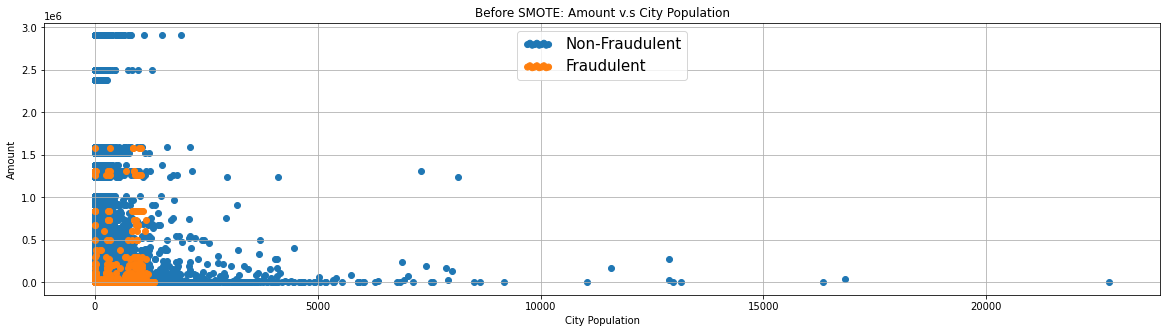

In [66]:
plt.figure(figsize=(20,5))
aa = plt.scatter(OG_data_temp[OG_data_temp["is_fraud"] == 0]["amt"], OG_data_temp[OG_data_temp["is_fraud"] == 0]["city_pop"], label='Non-Fraudulent')
bb = plt.scatter(OG_data_temp[OG_data_temp["is_fraud"] == 1]["amt"], OG_data_temp[OG_data_temp["is_fraud"] == 1]["city_pop"], label='Fraudulent')
plt.title("Before SMOTE: Amount v.s City Population")
plt.xlabel("City Population")
plt.ylabel("Amount")
plt.legend((aa, bb),
           ('Non-Fraudulent', 'Fraudulent'),
           scatterpoints=10,
           loc='upper center',
           fontsize=15)
plt.grid()
plt.show()

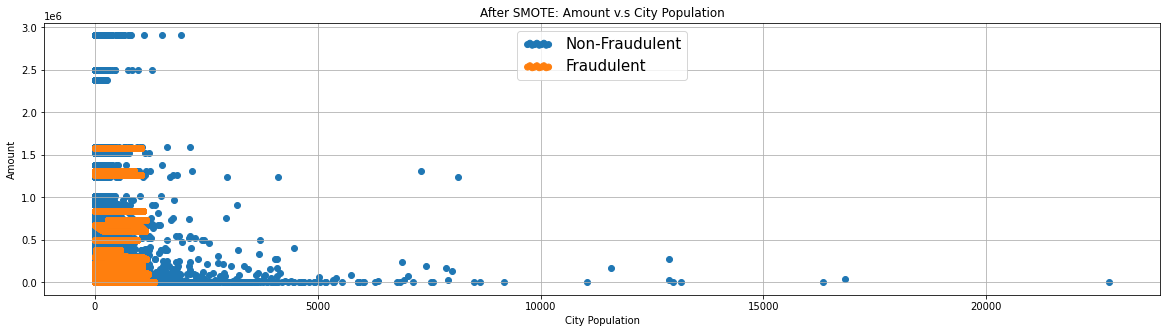

In [67]:
plt.figure(figsize=(20,5))
aa = plt.scatter(SMOTE_data_temp[SMOTE_data_temp["is_fraud"] == 0]["amt"], SMOTE_data_temp[SMOTE_data_temp["is_fraud"] == 0]["city_pop"], label='Non-Fraudulent')
bb = plt.scatter(SMOTE_data_temp[SMOTE_data_temp["is_fraud"] == 1]["amt"], SMOTE_data_temp[SMOTE_data_temp["is_fraud"] == 1]["city_pop"], label='Fraudulent')
plt.title("After SMOTE: Amount v.s City Population")
plt.xlabel("City Population")
plt.ylabel("Amount")
plt.legend((aa, bb),
           ('Non-Fraudulent', 'Fraudulent'),
           scatterpoints=10,
           loc='upper center',
           fontsize=15)
plt.grid()
plt.show()